## Neural network for recognizing handwritten digits

The recognition of handwritten digits with the nmist dataset (http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) can be seen as the hello world example of neural networks. In this notebook you will implement a neural network with convolutional layers.

### Import the data and visualize some samples

In [2]:
# Import necessary libraries
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint   
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
numpy.random.seed(23)

Using TensorFlow backend.


In [3]:
# Load data and make a training and testing split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshaping to a format suitable to keras (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

# Normalize the input features
X_train/=255
X_test/=255

# Encode the classes to numbers (one-hot encode)
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

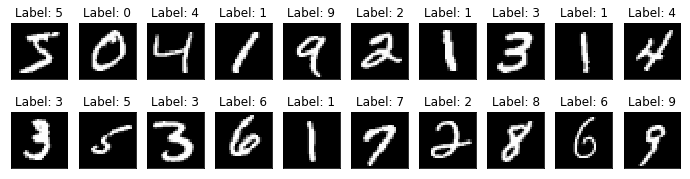

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Visualize some of our training data
plt.figure(figsize=(12, 3))
x, y = 10, 4
for i in range(20):  
    plt.subplot(2, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title('Label: %s' % int(sum(y_train[i] * [0,1,2,3,4,5,6,7,8,9])))
    plt.imshow(X_train[i].reshape((28,28)), cmap='gray', interpolation='nearest')
plt.show()

Each vector in our dataset is representing a grayscale image of 28 to 28 pixels. Every value in a vector represents a grayscale value of a single pixel (0-255 normalized to 0-1).

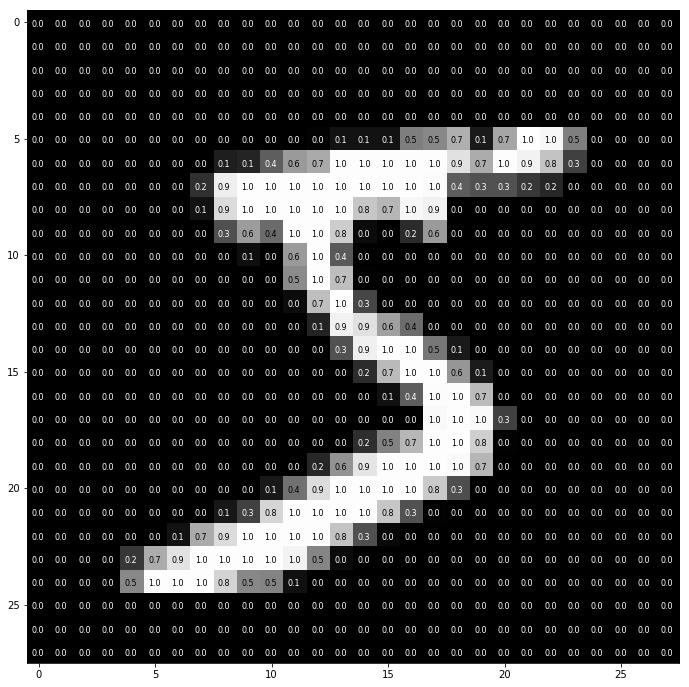

In [5]:
# Visualize composition of an image
plt.figure(figsize=(12, 12))
plt.imshow(X_train[0].reshape((28,28)), cmap='gray')
for i in range(28):
    for j in range(28):
        color = 'white' if X_train[0][j,i] < .4 else 'black' 
        plt.annotate('{:.1f}'.format(float(X_train[0][j,i])), (i-.3, j+.2), color=color, size=8)
plt.show()

### TODO: Build a convolutional neural network for training the images

TODO: You have to define the architecture of the layers. You will need convolutional layers (https://keras.io/layers/convolutional/#conv2d) to preserve spatial information of the pixels. Some hints are:
* Stick with the sequential model, there is not temporal information here
* It is advised to follow a convolutional layer (Conv2D) by a pooling layer (MaxPooling2D)
* If your accuracy is good but your validation accuracy is not, try to prevent overfitting by adding a dropout (https://keras.io/layers/core/#dropout)
* To rectifier unit has proven to be a good start for the activation of layers in networks (https://keras.io/activations/#available-activations)
* Because you try to predict multiple classes, the final layer needs to be a dense layer with the number of classes as neurons and a softmax activation function

In [8]:
# TODO: Define our convolutional neural network
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

TODO: If you have built your model you can compile, fit and validate it with the next cell. If the model is learning to slow you need to reduce the number of parameters (e.g. layers). Try to experiment with the parameters *epochs* and *batch_size*.

In [9]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='mnist.model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
# Fit the model
# TODO: Experiment with the parameters epochs and patch_size
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          callbacks = [checkpointer], epochs=5, batch_size=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 36s 604us/step - loss: 0.1203 - acc: 0.9628 - val_loss: 0.0471 - val_acc: 0.9838

Epoch 00001: val_loss improved from inf to 0.04708, saving model to mnist.model.weights.best.hdf5
Epoch 2/5
60000/60000 [==============================] - 34s 573us/step - loss: 0.0501 - acc: 0.9843 - val_loss: 0.0322 - val_acc: 0.9885

Epoch 00002: val_loss improved from 0.04708 to 0.03225, saving model to mnist.model.weights.best.hdf5
Epoch 3/5
60000/60000 [==============================] - 34s 565us/step - loss: 0.0382 - acc: 0.9879 - val_loss: 0.0318 - val_acc: 0.9909

Epoch 00003: val_loss improved from 0.03225 to 0.03185, saving model to mnist.model.weights.best.hdf5
Epoch 4/5
60000/60000 [==============================] - 35s 577us/step - loss: 0.0307 - acc: 0.9908 - val_loss: 0.0271 - val_acc: 0.9916

Epoch 00004: val_loss improved from 0.03185 to 0.02714, saving model to mnist.model.weights.

If you made use of convolutional layers, added proper pooling and some dropout it should be relatively easy to achieve an accuracy of > 0.8.

In [117]:
# Final evaluation of the model
model.load_weights('mnist.model.weights.best.hdf5')
metrics = model.evaluate(X_test, y_test, verbose=1)

print("Metrics (loss & accuracy): %s" % metrics)

10000/10000 [==============================] - 1s 54us/step
Metrics (loss & accuracy): [0.028055307366994384, 0.99119999999999997]


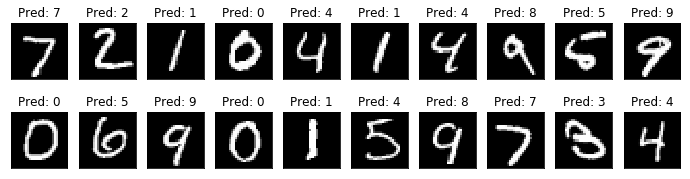

In [14]:
# Make some predictions with the trained model
y_predicted = model.predict(X_test)

plt.figure(figsize=(12, 3))
x, y = 10, 4
for i in range(20):  
    plt.subplot(2, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title('Pred: %s' % int(sum(y_predicted[i] * [0,1,2,3,4,5,6,7,8,9])))
    plt.imshow(X_test[i].reshape((28,28)), cmap='gray', interpolation='nearest')
plt.show()

Congratulation, you just implemented a convolutional neural network!